In [92]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [93]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [94]:
msg= pd.read_csv("msg_spam.csv",encoding="latin-1")

msg.head(n=10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### Data Cleaning and Preprocessing

In [95]:
msg.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
msg.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
msg.rename(columns={'v1':'labels','v2':'messages'},inplace=True)
msg.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [97]:
msg['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

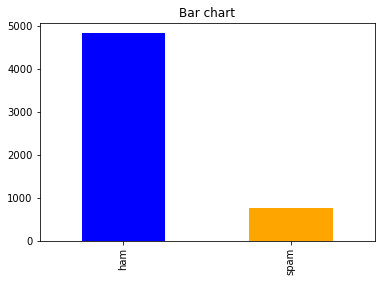

In [98]:
count_Class=pd.value_counts(msg["labels"], sort= True)
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

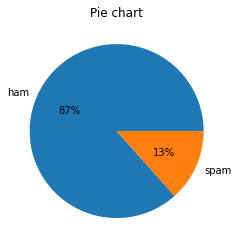

In [99]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

### Visualizing Data

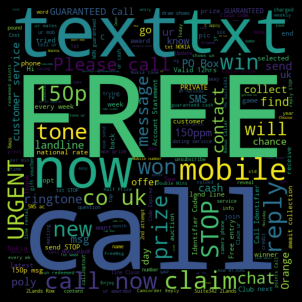

In [100]:
spam_words = ' '.join(list(msg[msg['labels'] == "spam"]['messages']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (6,4), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

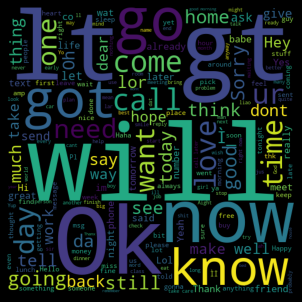

In [101]:
ham_words = ' '.join(list(msg[msg['labels'] == "ham"]['messages']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (6,4), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

### Feature Engineering

In [102]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp020\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp020\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [103]:
from nltk.corpus import stopwords

In [104]:
ps = PorterStemmer()
#lmtz = WordNetLemmatizer()
corpus = []

In [105]:
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['messages'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [106]:
#bag of word model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [107]:
#TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [108]:
#Creating dummy variables
y=pd.get_dummies(msg['labels'])
y=y.iloc[:,1].values

In [109]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Multinomial Naive Bayes Classifier
We train different bayes models changing the regularization parameter  α .

We evaluate the accuracy, recall and precision of the model with the test set.

In [110]:
# Training model using Naive bayes classifier
list_alpha = np.arange(1/100000, 20, 0.10)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0
for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 

In [111]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.998205,0.976675,0.894958,0.938326
1,0.10001,0.995385,0.982656,0.928571,0.948498
2,0.20001,0.992564,0.980263,0.903361,0.955556
3,0.30001,0.992308,0.979067,0.886555,0.963470
4,0.40001,0.988974,0.976675,0.857143,0.976077
5,0.50001,0.985641,0.974282,0.831933,0.985075
6,0.60001,0.985128,0.970694,0.806723,0.984615
7,0.70001,0.982564,0.968900,0.789916,0.989474
8,0.80001,0.980256,0.964115,0.756303,0.989011
9,0.90001,0.976923,0.961722,0.735294,0.994318


In [112]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]


alpha             1.000010
Train Accuracy    0.974872
Test Accuracy     0.957536
Test Recall       0.701681
Test Precision    1.000000
Name: 10, dtype: float64

In [113]:
models[models['Test Precision']==1].head(n=10)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
10,1.00001,0.974872,0.957536,0.701681,1.0
11,1.10001,0.972308,0.953947,0.676471,1.0
12,1.20001,0.969487,0.951555,0.659664,1.0
13,1.30001,0.967436,0.949163,0.642857,1.0
14,1.40001,0.965897,0.946172,0.621849,1.0
15,1.50001,0.963333,0.942584,0.596639,1.0
16,1.60001,0.961026,0.940789,0.584034,1.0
17,1.70001,0.958974,0.939593,0.575630,1.0
18,1.80001,0.956410,0.937201,0.558824,1.0
19,1.90001,0.956154,0.935407,0.546218,1.0


In [114]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]

alpha             1.000010
Train Accuracy    0.974872
Test Accuracy     0.957536
Test Recall       0.701681
Test Precision    1.000000
Name: 10, dtype: float64

In [115]:
bayes = naive_bayes.MultinomialNB(alpha=1.00010)
bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0001)

In [116]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1434,0
Actual 1,71,167


We misclassify 71 spam messages as non-spam emails whereas we don't misclassify any non-spam message.


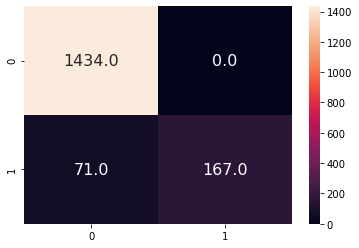

In [117]:
sn.heatmap(m_confusion_test, annot= True ,fmt='.1f',annot_kws={"size": 16})
plt.show()

### Support Vector Machines

In [118]:
list_C = np.arange(500, 1000, 100) #100000
score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    print(C)
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

500
600
700
800
900


In [119]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.978469,0.852941,0.995098
1,600.0,1.0,0.978469,0.852941,0.995098
2,700.0,1.0,0.978469,0.852941,0.995098
3,800.0,1.0,0.978469,0.852941,0.995098
4,900.0,1.0,0.978469,0.852941,0.995098


In [120]:
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.978469
Test Recall         0.852941
Test Precision      0.995098
Name: 0, dtype: float64

In [121]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,1433,1
Actual 1,35,203


We misclassify 35 spam messages as non-spam message whereas misclassify 1 non-spam message as spam message.

